## Name: _Amaan Pathan_
### Roll No.: _DS24MS05_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rahulinchal/SPPU/refs/heads/main/Data/updated_Airline_data.csv')
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing


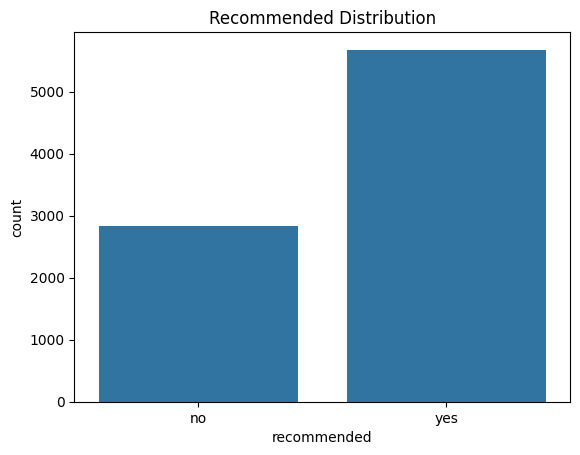

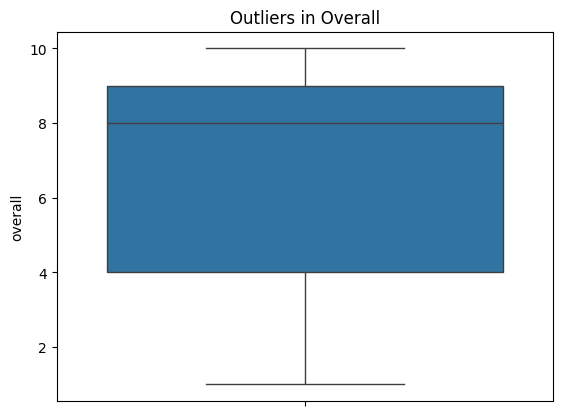

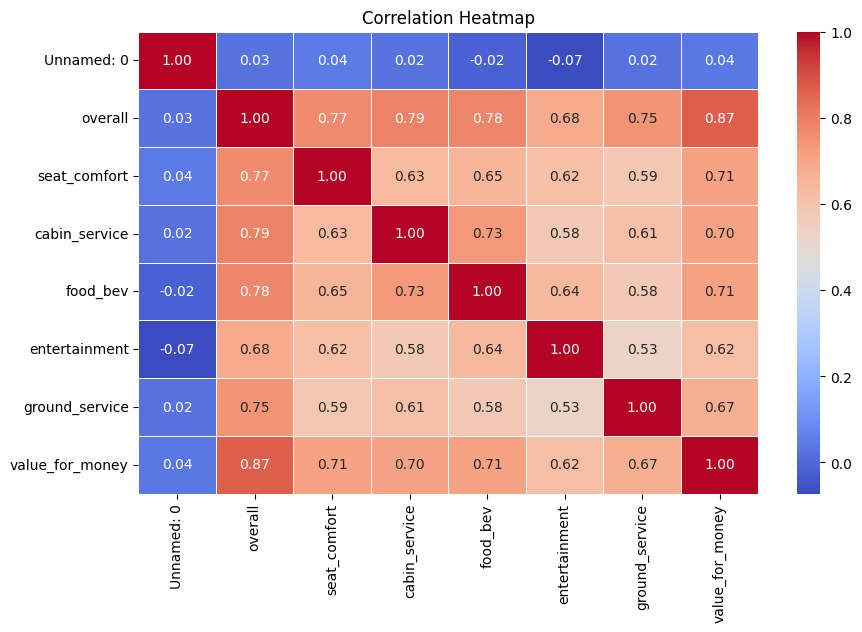

In [3]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['date_flown'] = pd.to_datetime(df['date_flown'], errors='coerce')

sns.countplot(x='recommended', data=df)
plt.title("Recommended Distribution")
plt.show()

sns.boxplot(df['overall'])
plt.title("Outliers in Overall")
plt.show()

plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [4]:
df['overall'] = np.log1p(df['overall'])

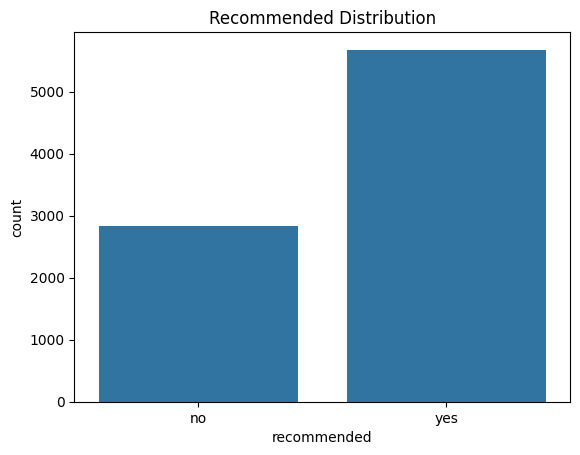

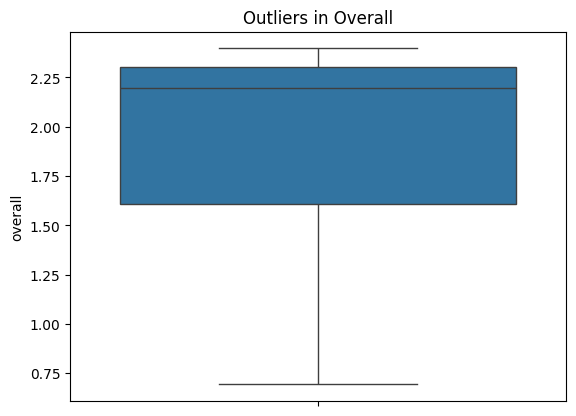

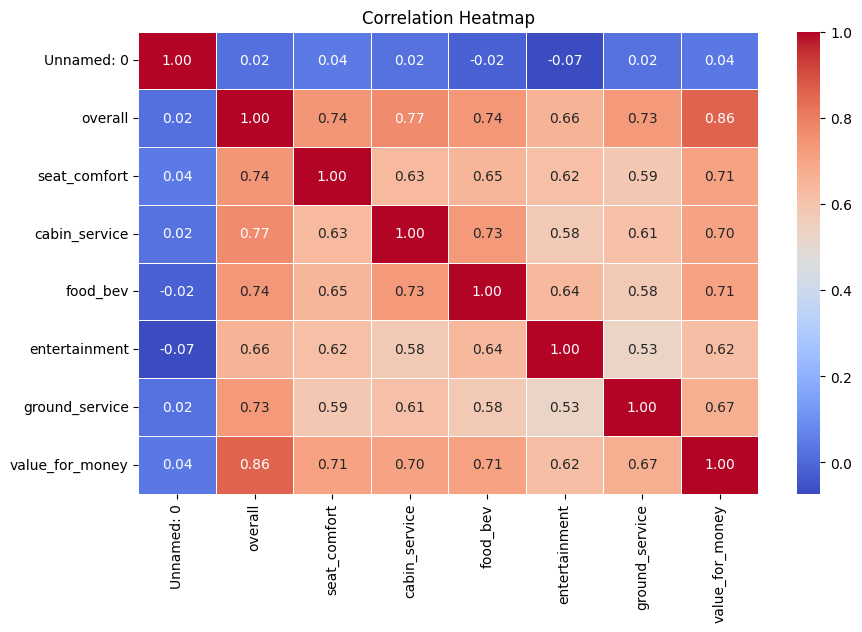

In [5]:
sns.countplot(x='recommended', data=df)
plt.title("Recommended Distribution")
plt.show()

sns.boxplot(df['overall'])
plt.title("Outliers in Overall")
plt.show()

plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [6]:
df = pd.get_dummies(df, columns=['traveller_type', 'cabin'], drop_first=True)

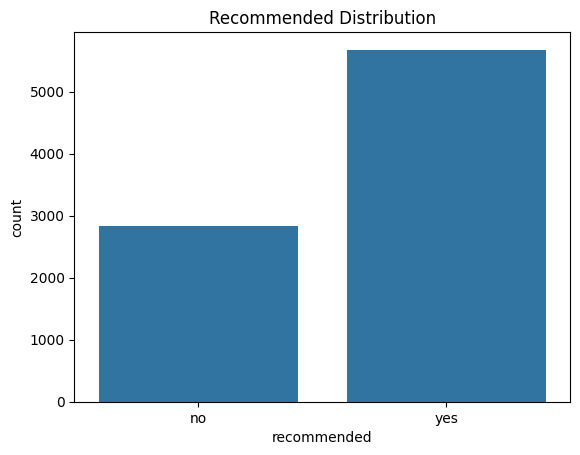

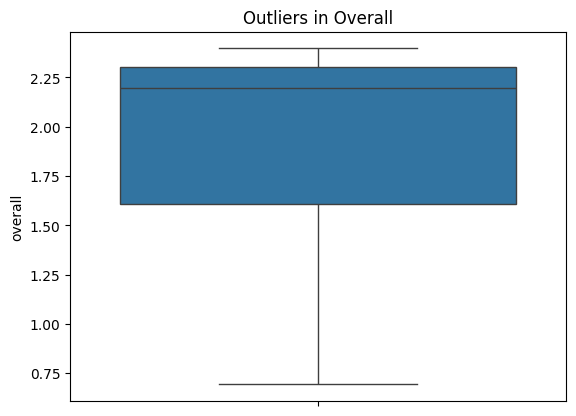

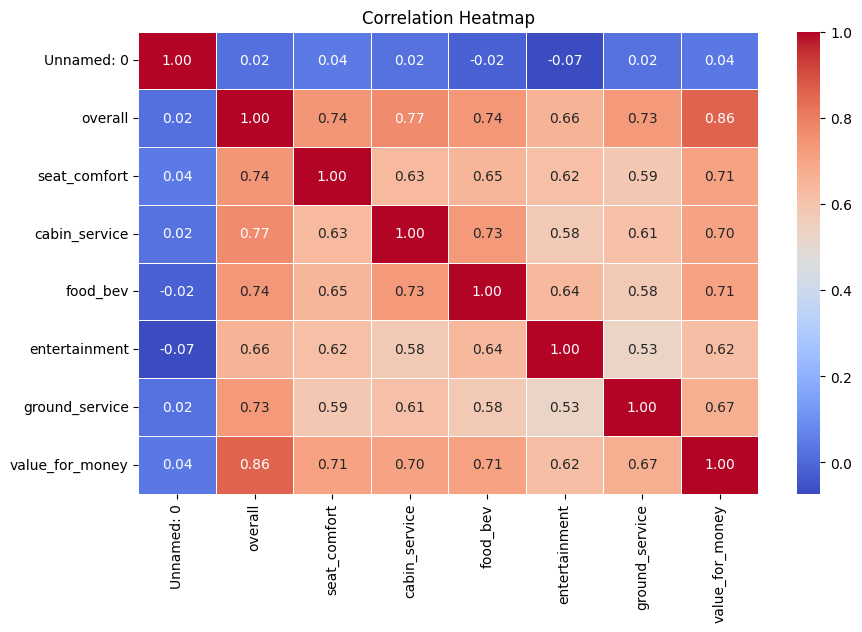

In [7]:
sns.countplot(x='recommended', data=df)
plt.title("Recommended Distribution")
plt.show()

sns.boxplot(df['overall'])
plt.title("Outliers in Overall")
plt.show()

plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [8]:
features = ['overall', 'food_bev', 'ground_service', 'value_for_money'] + \
			[col for col in df.columns if 'traveller_type_' in col or 'cabin_' in col]
X = df[features]
y = df['recommended']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_lr,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_lr,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(lr, X, y, cv=5)))



Logistic Regression:
Accuracy: 0.9388954171562868
Precision: 0.9439252336448598
Recall: 0.9669277632724108
F1 Score: 0.9552880481513327
Cross-Val Score: 0.9440607619351582


In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_dt,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_dt,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(dt, X, y, cv=5)))


Decision Tree:
Accuracy: 0.917743830787309
Precision: 0.9352890422778257
Recall: 0.9434290687554395
F1 Score: 0.9393414211438474
Cross-Val Score: 0.9250234361345472


In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_rf,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_rf,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(rf, X, y, cv=5)))


Random Forest:
Accuracy: 0.936545240893067
Precision: 0.9460154241645244
Recall: 0.9608355091383812
F1 Score: 0.9533678756476683
Cross-Val Score: 0.9414759825387845


In [14]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_svm,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_svm,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(svm, X, y, cv=5)))


Support Vector Machine:
Accuracy: 0.9347826086956522
Precision: 0.9398305084745763
Recall: 0.9651871192341166
F1 Score: 0.9523400601116359
Cross-Val Score: 0.9433556399739974


In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn,pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_knn,pos_label='yes'))
print("F1 Score:", f1_score(y_test, y_pred_knn,pos_label='yes'))
print("Cross-Val Score:", np.mean(cross_val_score(knn, X, y, cv=5)))


K-Nearest Neighbors:
Accuracy: 0.9294947121034077
Precision: 0.9349112426035503
Recall: 0.9625761531766753
F1 Score: 0.9485420240137221
Cross-Val Score: 0.9290178377134899
